# COMP-1828 Coursework code template 2021-22 

## To execute a code cell, please PRESS SHIFT + ENTER.
## **To edit the file,** 
 - **Make sure that you are logged in to a Google account.**
 - **Make a copy of the file by expanding the [File] menu and selecting [Save a copy in Drive],**
 - **Start editing the code.**

## **To submit the code,** 
 - **Download the .ipynb file by expanding the [File] menu and selecting [Download] -> [Download .ipynb],**
 - **Submit the file on Moodle.**

### **You are also required to copy some part of the file and paste it in the MS Word template file following the instruction.**

# Creating `numpy` array of the latitude and longitude of 20 cities in the UK.

In [210]:
from io import StringIO
import numpy as np
import pandas as pd
latitude_longitude_csv_str =\
"""\
city,latitude,longitude
London,51.5072,-0.1275
Birmingham,52.48,-1.9025
Manchester,53.4794,-2.2453
Leeds,53.7997,-1.5492
Newcastle,55.0077,-1.6578
Birstall,52.6736,-1.12
Glasgow,55.8609,-4.2514
Liverpool,53.4,-2.9833
Portsmouth,50.8058,-1.0872
Southampton,50.9,-1.4
Nottingham,52.95,-1.15
Bristol,51.45,-2.5833
Sheffield,53.3833,-1.4667
Kingston upon Hull,53.7444,-0.3325
Leicester,52.6333,-1.1333
Edinburgh,55.953,-3.189
Caerdydd,51.4833,-3.1833
Stoke-on-Trent,53,-2.1833
Coventry,52.4081,-1.5106
Reading,51.4542,-0.9731\
"""
latitude_longitude_pd = pd.read_csv(StringIO(latitude_longitude_csv_str), index_col='city')
latitude_longitute_deg = latitude_longitude_pd[['latitude', 'longitude']].to_numpy()


## Visualize the table.

In [211]:
display(latitude_longitude_pd)

,latitude,longitude
city,,
London,51.5072,-0.1275
Birmingham,52.4800,-1.9025
Manchester,53.4794,-2.2453
Leeds,53.7997,-1.5492
Newcastle,55.0077,-1.6578
Birstall,52.6736,-1.1200
Glasgow,55.8609,-4.2514
Liverpool,53.4000,-2.9833
Portsmouth,50.8058,-1.0872


## Show the `numpy` array.

In [212]:
display(latitude_longitute_deg)

array([[51.5072, -0.1275],
       [52.48  , -1.9025],
       [53.4794, -2.2453],
       [53.7997, -1.5492],
       [55.0077, -1.6578],
       [52.6736, -1.12  ],
       [55.8609, -4.2514],
       [53.4   , -2.9833],
       [50.8058, -1.0872],
       [50.9   , -1.4   ],
       [52.95  , -1.15  ],
       [51.45  , -2.5833],
       [53.3833, -1.4667],
       [53.7444, -0.3325],
       [52.6333, -1.1333],
       [55.953 , -3.189 ],
       [51.4833, -3.1833],
       [53.    , -2.1833],
       [52.4081, -1.5106],
       [51.4542, -0.9731]])

# Defining the `ll_to_distance_matrix` function.
- Input: `N x 2` NumPy array, where the `i`-th row is the latitude (degree) and
longitude (degree) of the `i`-th city.
- Output: `N x N` NumPy array, where the entry in the `i`-th row and the `j`-th
column is the distance between the `i`-th and `j`-th cities.


In [213]:
import numpy as np
def ll_to_distance_matrix(latitude_longitute_deg):
  la_lo_rad = np.pi * latitude_longitute_deg / 180.0
  la, lo = la_lo_rad[:, 0], la_lo_rad[:, 1]
  earth_radius = 6370.0
  distance_matrix = earth_radius * np.arccos(np.sin(la[:, np.newaxis]) * np.sin(la[np.newaxis, :]) + np.cos(la[:, np.newaxis]) * np.cos(la[np.newaxis, :]) * np.cos(lo[:, np.newaxis] - lo[np.newaxis, :]))
  return distance_matrix


# **Coursework Q1-3 a)**: Implement `tsp_from_ll` **(PLEASE COMPLETE THE IMPLEMENTATION)**. 
- Please implement the `tsp_from_ll` function in the following cell and **copy the cell and paste it in the form of Q1-3 a) in the MS Word template file.**
- Input:
  - `N x 2` NumPy array, where the i-th row is the latitude (degree) and
longitude (degree) of the i-th city.
  - The list of city names. Size `N`.
- Output: the tuple consisting of the following two.
  - The list of city names in the order of an efficient circuit. Size `N`. London is the zeroth entry and not appended at the end.
  - The total length of the circuit.
- For the implementation, please use 
  - `ll_to_distance_matrix`
  - `networkx.from_numpy_matrix`,
  - `networkx.algorithms.tree.mst.minimum_spanning_tree`,
  - `networkx.algorithms.traversal.depth_first_search.dfs_preorder_nodes`.


In [214]:
import numpy as np # import numpy and set "np" as it
import matplotlib.pyplot as plt # needed for visualize the graph
import networkx as nx # import networkx and set "nx" as the indicate of it
from networkx import from_numpy_matrix # from networkx and import "from_numpy_matrix"
from networkx.algorithms.tree.mst import minimum_spanning_tree
from networkx.algorithms.traversal.depth_first_search import dfs_preorder_nodes
# the function tsp_from_ll
def tsp_from_ll(latitude_longitute_deg, city_list):
    # using numpty matrice array 
    d_matrix = np.array(ll_to_distance_matrix(latitude_longitute_deg)) 
    # do a for loop to check the city list 
    for i in range(len(city_list)):
      d_matrix[i][i] = 0
    # import nx.from_numpy_matrix 
    g_matrix = nx.from_numpy_matrix(d_matrix)
    # picture the graph
    nx.draw(g_matrix, with_labels=True)
    # add title
    plt.title("All weight")
    # show the graph 
    plt.show()                          
    # Return a minimum spanning tree
    tree = minimum_spanning_tree(g_matrix)  
    # draw graph
    nx.draw(tree, with_labels=True)
    # add the title
    plt.title("Smallest weight")
    # show the graph
    plt.show()
    # Return a mst and the weight
    print("Minimum spanning tree =",tree.size(weight="weight"))    
    # Return a dfs list and the list result   
    dfs = list(dfs_preorder_nodes(tree, source=0))                            
    # Return ordered city                  
    ordered_city_list = [city_list[dfs[i]] for i in range(len(dfs))]
    # Return total distance with the times of weight of tree size                  
    total_distance = np.sum([d_matrix[dfs[i]][dfs[(i+1)%len(dfs)]]for i in range(len(dfs))])
    # return both ordered city and total distance 
    return ordered_city_list, total_distance

# **Coursework Q1-3 b)**: List the cities in the visiting order of the route.
**Copy the output of the following cell and paste it in the form of Q1-3 b) in the MS Word template file.**

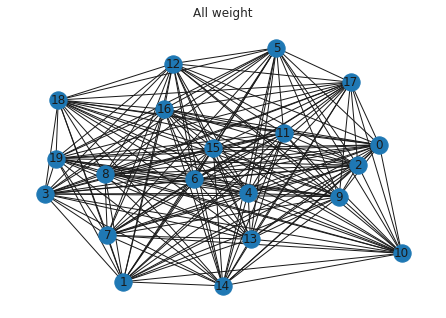

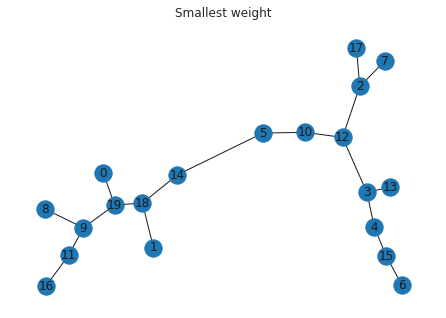

Minimum spanning tree = 1186.41604612535
London, Reading, Southampton, Portsmouth, Bristol, Caerdydd, Coventry, Birmingham, Leicester, Birstall, Nottingham, Sheffield, Leeds, Kingston upon Hull, Newcastle, Edinburgh, Glasgow, Manchester, Liverpool, Stoke-on-Trent


In [215]:
ordered_city_list, total_distance = tsp_from_ll(latitude_longitute_deg, list(latitude_longitude_pd.index))
print(', '.join(ordered_city_list))

# **Coursework Q1-3 c)**: Show the total length of the route.
**Copy the output of the following cell and paste it in the form of Q1-3 c) in the MS Word template file.**

In [216]:
print(total_distance)

1775.9194252674447


# APPENDIX: visualization of the route
You can visualize the result by executing the following cell. 

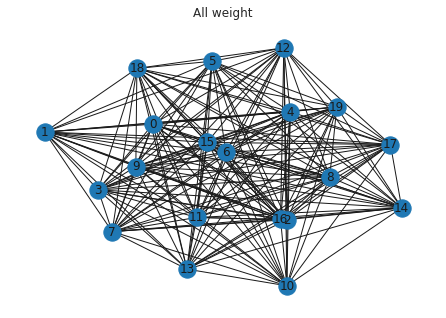

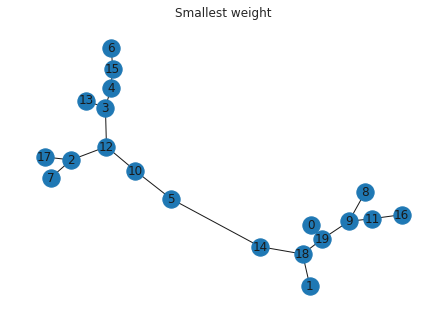

Minimum spanning tree = 1186.41604612535


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


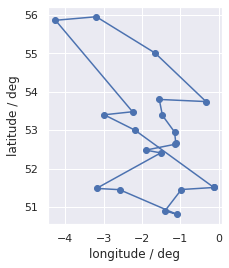

In [217]:
ordered_city_list, total_distance = tsp_from_ll(latitude_longitute_deg, list(latitude_longitude_pd.index))
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.plot(latitude_longitude_pd.loc[ordered_city_list + ['London'], 'longitude'], latitude_longitude_pd.loc[ordered_city_list + ['London'], 'latitude'], 'o-')
plt.xlabel('longitude / deg')
plt.ylabel('latitude / deg')
plt.axes().set_aspect('equal')